# Task#8. Numpy

# Текст задачи

## Задача 8. numpy

* **Дедлайн**: 21.11.2024, 23:59
* Полный балл: 5

## Задача

Все пункты задания выполняются в ноутбуке, в PR стоит прикладывать сам ноутбук, ссылку на него в облачном сервисе (к примеру, Google colab) и файлы датасета

- Выполняется с помощью numpy и базовой функциональности python.
  - [ ] Получить датасет [**Ирис**](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
  - [ ] Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу `(n, 4)`, названия самого ириса --- вектор размера n). Отобразите сколько места он занимает.
  - [ ] Нормализуйте данные на промежуток от 0 до 1 для каждой колонки
  - [ ] Представьте один из признаков в виде категориальной переменной и её на три типа используя квантили:
    - < 0.25 --- small
    - 0.25-0.75 --- medium
    - \> 0.75 --- big
  - [ ] Разделите датасет на две случайные выборки (0.8 / 0.2)
- Выполняется с помощью пакетов sklearn и numpy
  - [ ] Выберите один из [методов классификации](https://scikit-learn.org/stable/supervised_learning.html) \(к примеру, [SVC](https://scikit-learn.org/stable/modules/svm.html)), обучите на тренировочном датасете, оцените результат на тестовом и сделайте выводы
  - [ ] Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), сделайте выводы
  - [ ] Пользуясь методами [уменьшения размерности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [t-sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) визуализируйте датасет.
  Это должен быть scatter plot, где точка это отдельный ирис, ее координаты -- признаки со сжатой выбранной вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где
    - Тип ириса выбирается из оригинальных данных
    - Тип ириса выбирается из предсказанных данных
- [ ] **(Доп., +3 балла)** Создайте матрицу с произвольными значениями в стандартной конфигурации Google colab. Владельцы трёх наибольших матриц получат +3 балла
  - Задание делается в отдельном ноутбуке и сдаётся очно
  - В матрице должно быть более 2 различных значений
  - Вы можете сами присваивать значения и устанавливать их порядок
  - В каждой строчке и каждом столбце должен быть ненулевой элемент
  - Матрица должна быть конечной --- последний элемент должен быть извлекаемым и ненулевым
  - Можно использовать numpy, pandas, scipy
  - Баллы за задание получат только владельцы трёх наибольших матриц. Итог подводится в день дедлайна

# $\circ$ Выполняется с помощью numpy и базовой функциональности python.

## $\blacksquare$ Получить датасет Ирис

Получаем датасет Ирис с [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) по url запросу.

P.S. наверное, можно было загрузить локально и подгрузить, или с `scikit-learn`-а достать, но в указании к задачи лежал url и сказано не `скачать`, как в прошлом задании а `получить`, поэтому подумала что нужно так сделать.

Подключаем google drive в корне

####  Тут часть ячеек, которая была написана в google colab, в виде текста, после них идут ячейки подготовки данных из vs code, т.к. библиотека google.colab недоступна  

In [1]:
# Эти ячейки ниже закомментированы, т.к. работу выполняла в google colab,
# а это дубликат того ноутбука, для того чтобы отправить PR. 

# Для того чтобы код был корректен и vs code, выполнял (и не выдавал ошибок об отсутствии drive),
# после них загружу файл локально.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !ls # Check

Получаем файл с данными по url

In [4]:
# import urllib.request

# # URL to download the data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# # (IrisDataset dir already exists)
# file_path = "/content/drive/MyDrive/spbu-python-course/task#8/iris_dataset/iris.data"  # Local file name

# # Download and save the file
# urllib.request.urlretrieve(url, file_path)

# print(f"The file was downloaded and saved as {file_path}")

#### Тут же локально загружаю файлы чтобы vs code не выдавал ошибку по отсутстующего `import google.colab import drive`

In [5]:
!ls # Сheck where I am now

iris_dataset  numpy.ipynb


In [6]:
file_path = "iris_dataset//iris.data"

### Загружаем данные из файла

In [7]:
import numpy as np

try:
  # Download data as ndarray
  data = np.genfromtxt(file_path, delimiter=",", dtype=str)
except Exception:
  print(f"Something went wrong while downloading the data file:{Exception}")

Проверим загрузку и посмотрим на струкутру файла

In [8]:
print(f"Data type: {type(data)}")
print(f"Data shape: {data.shape}")
print(f"First 5 rows of data: \n{data[:5]}")

Data type: <class 'numpy.ndarray'>
Data shape: (150, 5)
First 5 rows of data: 
[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']]


 ## $\blacksquare$ Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу `(n, 4)`, названия самого ириса --- вектор размера `n`). Отобразите сколько места он занимает.

### Разделяем данные на признаки и метки с названиями Ирисов. Проверка размерностей

In [9]:
try:
  # Divide data into features (first 4 cols) and labels (last col)
  features = data[:, :4].astype(float)  # Convert to float for numerical operations
  labels_str = data[:, 4].astype(str)  # Leave labels_str as strings
except Exception:
  print(f"Something went wrong while dividing the data :{Exception}")

print("The features matrix :\n", features[:2],"\n...\n", features[data.shape[0]-2:data.shape[0]])
print(f"Dimension: {features.shape}\n")
print("The labels_str vector :\n", labels_str[:2], "...", labels_str[data.shape[0]-2:data.shape[0]])
print(f"Dimension: {labels_str.shape}")

The features matrix :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]] 
...
 [[6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]
Dimension: (150, 4)

The labels_str vector :
 ['Iris-setosa' 'Iris-setosa'] ... ['Iris-virginica' 'Iris-virginica']
Dimension: (150,)


Видно, что размерности корректны (`(150, 4)` и `(150,)` (у нас `n`=150))

In [10]:
# Check number of bytes with str labels
print(f"The size of the label vector (labels_str): {labels_str.shape}, takes {labels_str.nbytes} bytes")

The size of the label vector (labels_str): (150,), takes 9000 bytes


Преобразуем метки в целочисленный тип `int` для дальнейшего удобства (и экономии памяти)

In [11]:
unique_labels, labels = np.unique(labels_str, return_inverse=True)

print(f"First 5 labels : {labels[:5]}, elements type: {type(labels[1])},\n")
print(f"labels type: {type(labels)},\nlabels shape: {labels.shape}")

First 5 labels : [0 0 0 0 0], elements type: <class 'numpy.int64'>,

labels type: <class 'numpy.ndarray'>,
labels shape: (150,)


### Сколько места они занимают:

С помощью `nbytes` определим размер в байтах и вновь проверим размерности разделенных массивов

In [12]:
print(f"The size of the feature matrix (features): {features.shape}, takes {features.nbytes} bytes")
print(f"The size of the label vector (labels): {labels.shape}, takes {labels.nbytes} bytes")

The size of the feature matrix (features): (150, 4), takes 4800 bytes
The size of the label vector (labels): (150,), takes 1200 bytes


Как видно из вывода выше, размерности матрицы признаков и названий `(150, 4)` и `(150,)` что корректно (у нас `n`=150),

а также, что они занимают **4800** и **1200** байтов соответственно

 ## $\blacksquare$ Нормализуйте данные на промежуток от 0 до 1 для каждой колонки

Теперь нормализуем данные в `features` на интервал от 0 до 1 для каждого столбца (признака):

In [13]:
features_min = features.min(axis=0) # 0 is vertical axis (cols)
features_max = features.max(axis=0)

features_normalized = (features - features_min)/(features_max - features_min) # values in [0;1]
features_normalized[:4]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667]])

Нормализованные данные о признаках: `features_normalized`

## $\blacksquare$ Представьте один из признаков в виде категориальной переменной и разделите её на три типа используя квантили:
    - < 0.25 --- small
    - 0.25-0.75 --- medium
    - > 0.75 --- big

Представим предпоследний (из 3 колонки, который интерпретируется как длина лепестка в др. источниках) признак как категориальный с соответственными категориями по разбиеню с данными квантилями

In [14]:
# Choose feature for categorisation (third)
third_feature = features_normalized[:, 2]

# Create empty nparray for future categories
categories_3 = np.empty_like(third_feature, dtype = object)

# Define quantiles
q25 = np.quantile(third_feature, 0.25)
q75 = np.quantile(third_feature, 0.75)

# Add values by its category
categories_3[third_feature < q25] = 'small'
categories_3[(third_feature >= q25) & (third_feature <= q75)] = 'medium'
categories_3[third_feature > q75] = 'big'

print(f"Third feature categories:\n {categories_3[:5]} ...{categories_3[145:categories_3.shape[0]]}")

Third feature categories:
 ['small' 'small' 'small' 'small' 'small'] ...['big' 'medium' 'big' 'big' 'medium']


Таким образом, разделили на категории третий столбец

 ## $\blacksquare$ Разделите датасет на две случайные выборки (0.8 / 0.2)

Разделим данные на две случайные выборки для обучения и тестирования по 80% и 20% соответственно.

Применим обозначения (`X` - признаки,`Y`- метки) и установим состояние сида равное `42` как общепринято

In [15]:
X = features_normalized
y = labels

# Fixing a random seed for reproducibility
np.random.seed(42)

# Shuffle the indexes and define the boundary for the training and test samples
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])

# Separation into training and test samples using X and Y
X_train = X[indices[:train_size]] # First 80%
y_train = y[indices[:train_size]]
X_test = X[indices[train_size:]] # Rest 20%
y_test = y[indices[train_size:]]

print("The size of the training sample (X_train):", X_train.shape)
print("The size of the test sample (X_test):", X_test.shape)

The size of the training sample (X_train): (120, 4)
The size of the test sample (X_test): (30, 4)


# $\circ$ Выполняется с помощью пакетов sklearn и numpy

 ## $\blacksquare$ Выберите один из [методов классификации](https://scikit-learn.org/stable/supervised_learning.html) \(к примеру, [SVC](https://scikit-learn.org/stable/modules/svm.html)), обучите на тренировочном датасете, оцените результат на тестовом и сделайте выводы

Выбрала стандартный метод классификации SVC

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
# Creating the default SVC model
model = SVC()

Обучаем модель на обучающей выборке

In [18]:
# Train model on training data
model.fit(X_train, y_train)

SVC()

Оцениваем на тестовой выборке

In [19]:
# Making prediction on test sample
y_pred = model.predict(X_test)

In [20]:
# Calculate and output the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy based on test data:", accuracy)

Model accuracy based on test data: 0.9666666666666667


### $\Rightarrow$ Вывод (стандартный `SVC`)

Исходя из точности в почти 97% можно сделать вывод, что данную модель хорошо обучилась и ее можно использовать.

(Также, можно подумать о переобучении модели, но на этом датасете вроде такого не должно происходить в виду простоты как данных, так и модели, но могу ошибаться)

  ## $\blacksquare$ Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), сделайте выводы

### Эксперимент 1
(Используем измененный гиперпараметр `C` - регуляризационный параметр)

In [21]:
# model with increased C value
model_high_C = SVC(C=10.0, random_state=42)
model_high_C.fit(X_train, y_train)
y_pred_high_C = model_high_C.predict(X_test)
accuracy_high_C = accuracy_score(y_test, y_pred_high_C)
print(f"The accuracy of the model with a high C value (C=10): {accuracy_high_C}")

# model with decreased C value
model_low_C = SVC(C=0.1, random_state=42)
model_low_C.fit(X_train, y_train)
y_pred_low_C = model_low_C.predict(X_test)
accuracy_low_C = accuracy_score(y_test, y_pred_low_C)
print(f"The accuracy of the model with a low C value (C=0.1): {accuracy_low_C}")

The accuracy of the model with a high C value (C=10): 1.0
The accuracy of the model with a low C value (C=0.1): 0.9666666666666667


### $\Rightarrow$ Вывод (`C=10` и `C=0.1`)

- Высокое значение `C` приводит к более точному (100%), но менее устойчивому результату. Приводит к переобучению.

- Низкие (1 и <1) значения `C` помогают модели лучше обобщать и избегать переобучения. (Результаты как в стандартном `SVC`)

### Эксперимент 2
(Используем ядро `poly`, `degree = 3`)

In [22]:
model_poly = SVC(kernel='poly', degree=3, random_state=42)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"The accuracy of the polynomial core model (degree=3): {accuracy_poly}")

The accuracy of the polynomial core model (degree=3): 1.0


### $\Rightarrow$ Вывод (`poly`, `degree=3`)

Полиномиальное ядро со степенью 3 обеспечило 100% точность, что показывает его способность выявлять сложные паттерны. Но, опять же, высокая точность может говорить о риске переобучения.

### Эксперимент 3
(Используем `ненормализованные данные`)

In [23]:
X = features

np.random.seed(42)

# Shuffle the indexes and define the boundary for the training and test samples (no normalised)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])

# Separation into training and test samples using X
X_train_no_normalised = X[indices[:train_size]] # First 80%
X_test_no_normalised = X[indices[train_size:]] # Rest 20%


print("The size of the training sample (X_train_no_normalised):", X_train_no_normalised.shape)
print("The size of the test sample (X_test_no_normalised):", X_test_no_normalised.shape)

The size of the training sample (X_train_no_normalised): (120, 4)
The size of the test sample (X_test_no_normalised): (30, 4)


In [24]:
model_no_normalised = SVC()
model_no_normalised.fit(X_train_no_normalised, y_train)
y_pred_no_normalised = model_no_normalised.predict(X_test_no_normalised)
accuracy_no_normalised = accuracy_score(y_test, y_pred_no_normalised)
print(f"The accuracy of the non-normalised features: {accuracy_no_normalised}")

The accuracy of the non-normalised features: 0.9666666666666667


### $\Rightarrow$ Вывод (`no_normalised`)

Результаты точности для нормализованных и ненормализованных данных оказались одинаковыми (97%). Это говорит о том, что для данного набора данных нормализация не оказала существенного влияния на качество модели. Вероятно это из-за того, что признаки в исходном наборе данных уже находятся в сопоставимом диапазоне значений, что снижает необходимость нормализации.

Тем не менее, в большинстве задач нормализация остается полезным шагом, особенно если признаки сильно разнятся по масштабу

  ## $\blacksquare$ Пользуясь методами [уменьшения размерности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [t-sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) визуализируйте датасет.
  Это должен быть scatter plot, где точка это отдельный ирис, ее координаты -- признаки со сжатой выбранной вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где
  
    - Тип ириса выбирается из оригинальных данных
    - Тип ириса выбирается из предсказанных данных

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [26]:
# prediction on all data on a model trained by propper data (no_normalized)
y_pred_all = model_no_normalised.predict(features)

In [27]:
# Check that
# X-all features standard; y - all labels standard(int); y_pred_all - predicted in all x(int)
print("X:",X[:5])
print("y:",y[::5])
print("y_pred_all:",y_pred_all[::5])

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
y_pred_all: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


### `PCA`

In [28]:
# use PCA to reduce the dimension
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)  # apply PCA to the entire dataset (both training and test data)

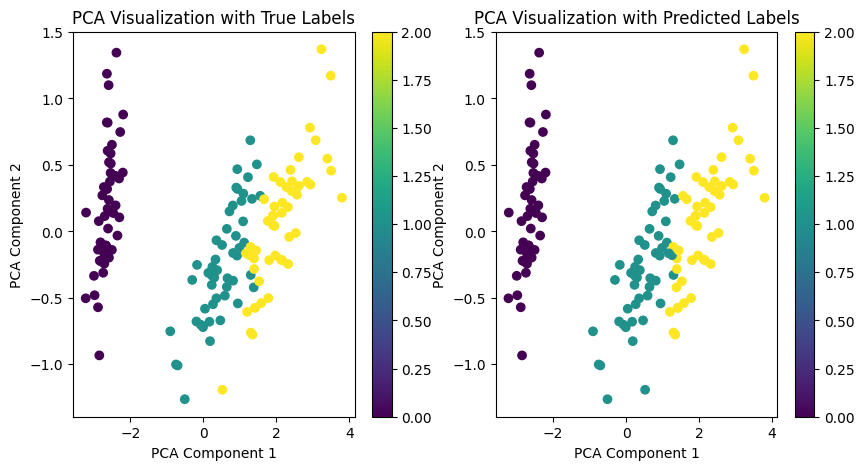

In [29]:
# Visualization with PCA and true labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)  # Using y (true labels)
plt.title('PCA Visualization with True Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

# Visualization with PCA and predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_all)  # Using y_pred_all (predicted labels)
plt.title('PCA Visualization with Predicted Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

### `t-sne`

In [30]:
# use t-SNE to reduce the dimension
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)  # Apply t-SNE to the entire dataset (both training and test data)

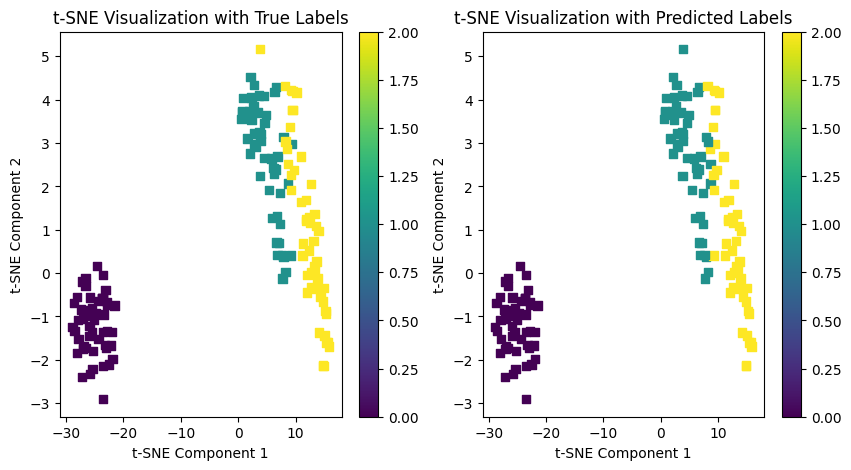

In [31]:
# Visualization with t-SNE and true labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='s')  # Using y (true labels)
plt.title('t-SNE Visualization with True Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

# Visualization with t-SNE and predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_all, marker='s')  # Using y_pred_all (predicted labels)
plt.title('t-SNE Visualization with Predicted Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()